In [1]:
# !pip install html5lib
# !pip install lxml
# !pip install beautifulSoup4

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
page_no = 1
product_url = "https://search.shopping.naver.com/catalog/21098473707"
print(product_url)
url = f"https://search.shopping.naver.com/api/review?isNeedAggregation=N&nvMid=21098473707&page={page_no}&pageSize=20&sortType=QUALITY"
print(url)

https://search.shopping.naver.com/catalog/21098473707
https://search.shopping.naver.com/api/review?isNeedAggregation=N&nvMid=21098473707&page=1&pageSize=20&sortType=QUALITY


In [4]:
def find_review_page(page_no):
    url = f"https://search.shopping.naver.com/api/review"
    params = {
        "isNeedAggregation": "N",
        "nvMid": "21098473707",
        "page": page_no,
        "pageSize": 20,
        "sortType": "QUALITY"
    }

    headers = {
        "path": f"/api/review?isNeedAggregation=N&nvMid=21098473707&page={page_no}&pageSize=20&sortType=QUALITY",
        "referer":"https://search.shopping.naver.com/catalog/21098473707",
        "user-agent": "Mozilla/5.0 ",
        "sbth": "1bfd439d6b41f4624bea6c112e310b9c412871aba70f2f714eabcd8cf3c8c900a2693a53c38128be910a712072424a2a"
    }
    response = requests.get(url, params=params, headers=headers)
    return response

In [5]:
page_no = 1
response = find_review_page(page_no)
print(response)
res_json = response.json()
res_json["totalCount"]

<Response [200]>


5856

In [6]:
pd.DataFrame(res_json["reviews"]).shape

(20, 31)

In [7]:
review_list = []
for page_no in range(1, 6):
    response = find_review_page(page_no)
    review_list.append(pd.DataFrame(response.json()["reviews"]))

In [8]:
df_review = pd.concat(review_list, ignore_index=True)
df_review.shape

(100, 31)

In [9]:
df_review.columns

Index(['id', 'buyOption', 'content', 'aidaCreateTime', 'aidaModifyTime',
       'esModifyTime', 'imageCount', 'imageYn', 'images', 'mallId',
       'mallProductId', 'mallReviewId', 'mallSeq', 'matchNvMid', 'modifyDate',
       'nvMid', 'pageUrl', 'qualityScore', 'rankScore', 'registerDate',
       'starScore', 'title', 'topicCount', 'topicYn', 'topics', 'userId',
       'videoCount', 'videoYn', 'videos', 'mallName', 'mallLogoUrl'],
      dtype='object')

In [10]:
df_review[["id", "content", "starScore", "qualityScore", "rankScore"]].head()

,id,content,starScore,qualityScore,rankScore
0,3229523142-ncp_1nm6ab_01-2663023129,말해모하나요...밤 중에서는 맛밤이 최고ㅠ<br>내년 1월 21일까지 유통기한 넉넉...,5,0.705253,1.135253
1,3215360336-ncp_1nm6ab_01-2663023129,1. 48개 구매하였으나 36개 +12개로 발송됨. 발송시 이에 대한 별도 안내가 ...,5,0.783670,1.053670
2,2016079645-juh5426-255464194,포장 꼼꼼하게 잘 보내 주셨습니다 가격도 착하고 유통기한도 넉넉합니다 ~^^ *스트...,5,0.757918,1.027918
3,3392771744-ncp_1nm6ab_01-2663023129,"유통기한도 길고, 부서지거나 망가진 밤알도 없고 맛도 좋아요. 간식으로 구매해서 거...",5,0.716348,0.986348
4,4109652462-ncp_1nxoyk_01-5304757738,백프로 <em>만족합니다</em>. <em>너무 맛있구요</em> 인터넷으로 구매하...,5,0.734867,0.984867


In [11]:
df_review[["id", "content"]].tail()

,id,content
95,3100770383-ncp_1nm6ab_01-2663023129,생각보다 양이 많아서 좋았어요.<br>맛도 있고 유통기한도 넉넉하고~ <br>아침대...
96,3148682992-ncp_1nm6ab_01-2663023129,저렴하게 잘 구매한 거 같아요. 유통기한 넉넉하지만 금세 다 먹게되니 별 상관없는 ...
97,3215317217-ncp_1nm6ab_01-2663023129,저번에도 구매해서 먹었는데 재구매합니다<br>유통기한도 넉넉하고 맛있고 가성비 짱이...
98,3162255841-ncp_1nm6ab_01-2663023129,맛밤은 좋은게 항상 그 맛을 유지하고있어서요. 이번에도 좋은가격에 득템한 기분입니다...
99,3147935276-ncp_1nm6ab_01-2663023129,싸게 구매했어요~<br>맛잇어서 금방 다 먹을 거 같아요!<br>다 먹고 다음에 또...


In [12]:
df_review[["id", "content"]].drop_duplicates()

,id,content
0,3229523142-ncp_1nm6ab_01-2663023129,말해모하나요...밤 중에서는 맛밤이 최고ㅠ<br>내년 1월 21일까지 유통기한 넉넉...
1,3215360336-ncp_1nm6ab_01-2663023129,1. 48개 구매하였으나 36개 +12개로 발송됨. 발송시 이에 대한 별도 안내가 ...
2,2016079645-juh5426-255464194,포장 꼼꼼하게 잘 보내 주셨습니다 가격도 착하고 유통기한도 넉넉합니다 ~^^ *스트...
3,3392771744-ncp_1nm6ab_01-2663023129,"유통기한도 길고, 부서지거나 망가진 밤알도 없고 맛도 좋아요. 간식으로 구매해서 거..."
4,4109652462-ncp_1nxoyk_01-5304757738,백프로 <em>만족합니다</em>. <em>너무 맛있구요</em> 인터넷으로 구매하...
...,...,...
95,3100770383-ncp_1nm6ab_01-2663023129,생각보다 양이 많아서 좋았어요.<br>맛도 있고 유통기한도 넉넉하고~ <br>아침대...
96,3148682992-ncp_1nm6ab_01-2663023129,저렴하게 잘 구매한 거 같아요. 유통기한 넉넉하지만 금세 다 먹게되니 별 상관없는 ...
97,3215317217-ncp_1nm6ab_01-2663023129,저번에도 구매해서 먹었는데 재구매합니다<br>유통기한도 넉넉하고 맛있고 가성비 짱이...
98,3162255841-ncp_1nm6ab_01-2663023129,맛밤은 좋은게 항상 그 맛을 유지하고있어서요. 이번에도 좋은가격에 득템한 기분입니다...


In [13]:
reviews = " ".join(df_review["title"].tolist())
reviews[:100]

'말해모하나요...밤 중에서는 맛밤이 최고ㅠ내년 1월 21일까지 유통기한 넉넉하고, 칼로리(125kcal)도 이만하면 간식거리로 나쁘지 않은 듯해요~여름철엔 냉장고에 넣어 먹어도 맛'

In [14]:
df_review.describe()

,imageCount,qualityScore,rankScore,starScore,topicCount,videoCount
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.760000,0.339622,0.532422,4.770000,1.600000,0.040000
std,0.996154,0.319047,0.282086,0.664466,1.589104,0.196946
min,0.000000,0.037359,0.256499,1.000000,0.000000,0.000000
25%,1.000000,0.065576,0.284279,5.000000,0.000000,0.000000
50%,2.000000,0.067831,0.335013,5.000000,1.000000,0.000000
75%,2.000000,0.696874,0.815415,5.000000,2.000000,0.000000
max,5.000000,0.783670,1.135253,5.000000,8.000000,1.000000


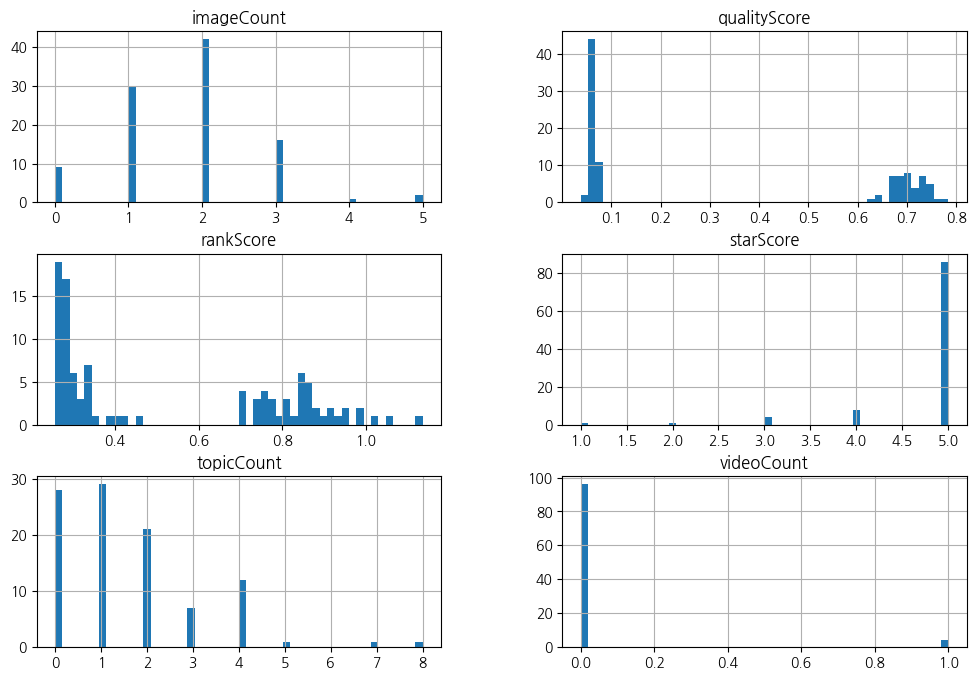

In [18]:
df_review.hist(figsize=(12, 8), bins=50);